## Dhaval Sunil Tharkar

## College Name: - B. K. Birla College of Arts, Science & Commerce 

## Project Name: - Bike Sharing Prediction Using Python

## Class: - M.Sc Data Science and Big Data Analytics Part 2 

## Semester: - 04

## Student Id: - 41867, Seat Number: -

![title](Bike-rental-prediction-case-study.png)

# Data description

## The business meaning of each column in the data is as below

<b>season:</b> The current season (1:winter, 2:spring, 3:summer, 4:fall)

<b>yr:</b> year (0: 2011, 1:2012)

<b>mnth:</b> month ( 1 to 12)
    
<b>hr:</b> hour of the day (0 to 23)
    
<b>holiday:</b> weather day is holiday or not
    
<b>weekday:</b> day of the week
    
<b>workingday:</b> if day is neither weekend nor holiday is 1, otherwise is 0
    
<b>weathersit:</b> The Weather forecast for the day
    
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
<b>temp:</b> Normalized temperature in Celsius.
    
<b>atemp:</b> Normalized feeling temperature in Celsius.
    
<b>hum:</b> Normalized humidity. The values are divided to 100 (max)
    
<b>windspeed:</b> Normalized wind speed. The values are divided to 67 (max)
    
<b>casual:</b> count of casual users

<b>registered:</b> count of registered users

<b>cnt:</b> count of total rental bikes including both casual and registered

### Importing Essentials Libraries

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

## Reading the Dataset in variable named as data

In [6]:
#import the csv file
bike_df=pd.read_csv("hour.csv")

In [7]:
#Shape of the dataset
bike_df.shape # shows the shape of the data variable in tuple format

(17379, 17)

In [8]:
#Data types
bike_df.dtypes # Displays the datatypes of each respective columns from the dataset

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
bike_df.head(5) # Shows the first five rows of the dataset from variable data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01 January 2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01 January 2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01 January 2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01 January 2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01 January 2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
bike_df.tail(5) # Shows the lasr five rows of the dataset from variable data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31 December 2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31 December 2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31 December 2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31 December 2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31 December 2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Rename the columns for better understanding of variables

In [11]:
#Rename the columns
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [12]:
bike_df.head(5)

,rec_id,datetime,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01 January 2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01 January 2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01 January 2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01 January 2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01 January 2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
bike_df.info() # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hr                 17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

### Typecasting the datetime and numerical attributes

In [14]:
#Type casting the datetime and numerical attributes to category

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [15]:
bike_df.describe() 
# shows the Statistical details like count, mean,standard deviation, minimum value, quartile 1 i.e. 25 %, 
# quartile 2 i.e. median or 50 %, quartile 3 i.e. 75%, maximum value

,rec_id,hr,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
bike_df.corr()

,rec_id,hr,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,-0.004775,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
temp,0.136178,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.009577,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.278379,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


<AxesSubplot:>

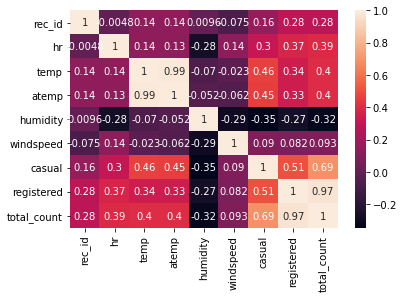

In [17]:
correlation = bike_df.corr()
sns.heatmap(correlation,annot=True) # Visualize the Correlation matrix

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

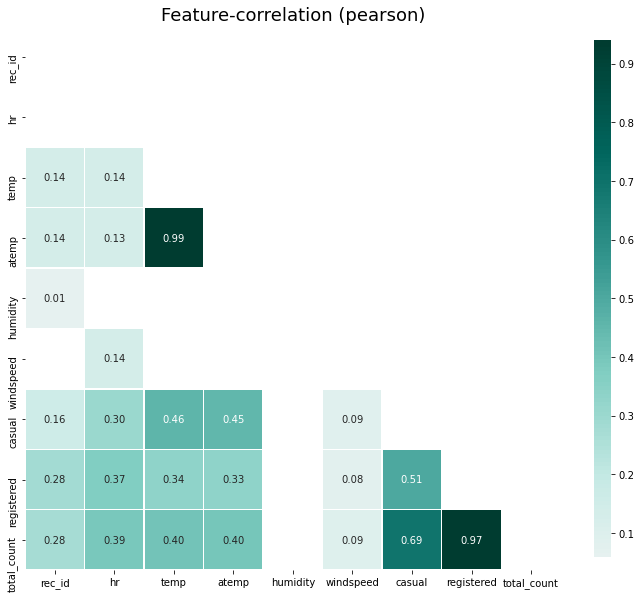

In [18]:
klib.corr_plot(bike_df, split = 'pos') # displays only the positive correlation

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

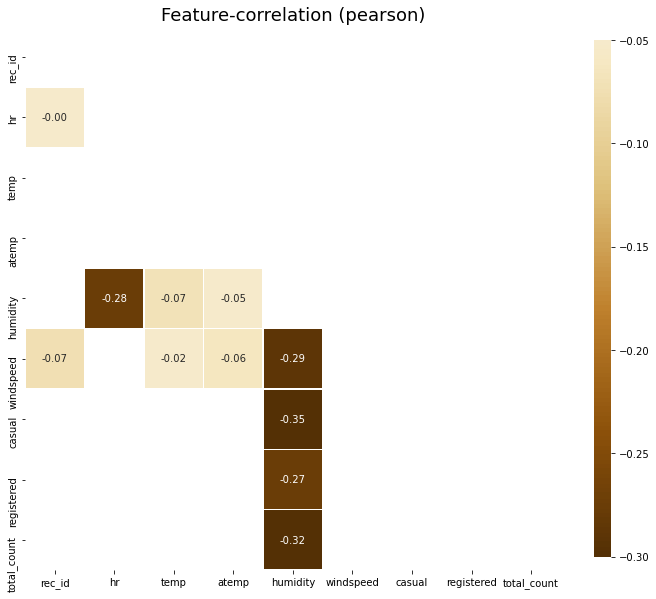

In [19]:
klib.corr_plot(bike_df, split = 'neg') # displays only the negative correlation

In [20]:
#Missing values in dataset
bike_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hr                   0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

### Monthly distribution of counts

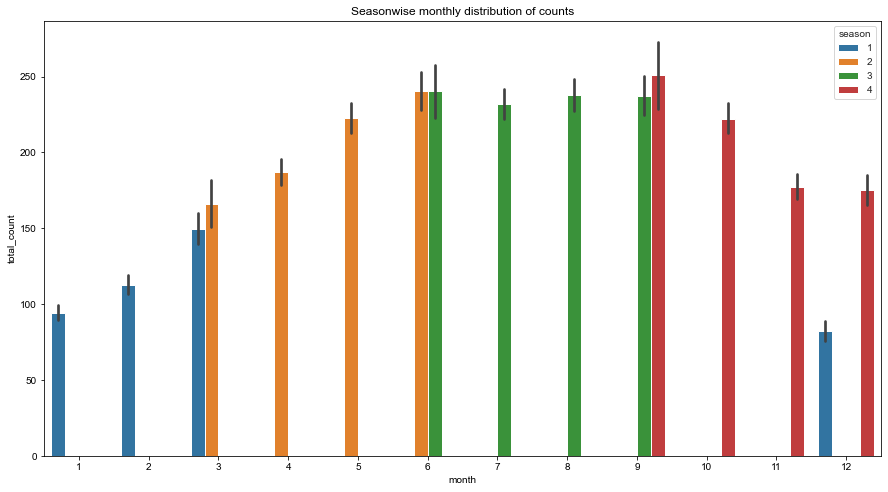

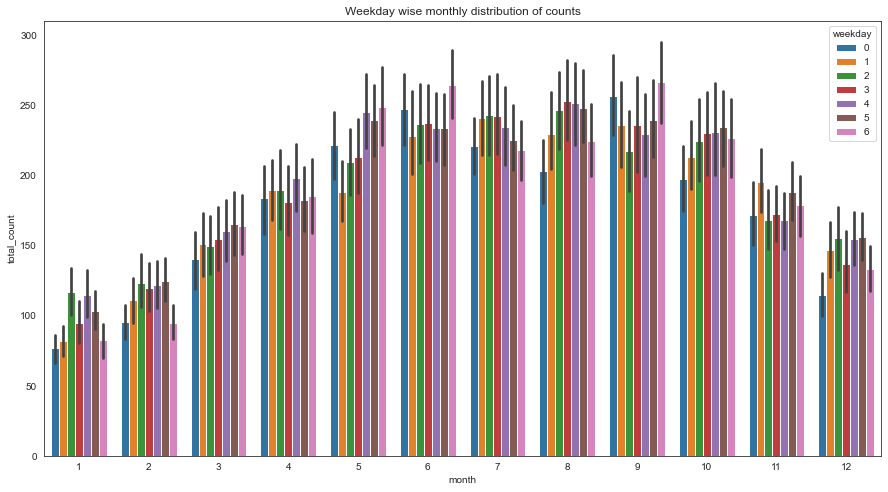

In [21]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season. Here,

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

### Yearly wise distribution of counts

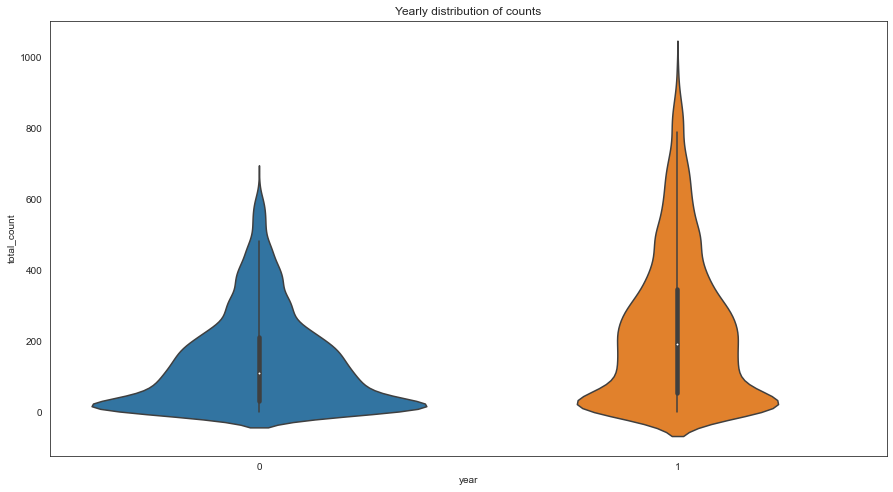

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=bike_df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.

Here,
year 0-> 2011, year 1-> 2012

###  Holiday wise distribution of counts

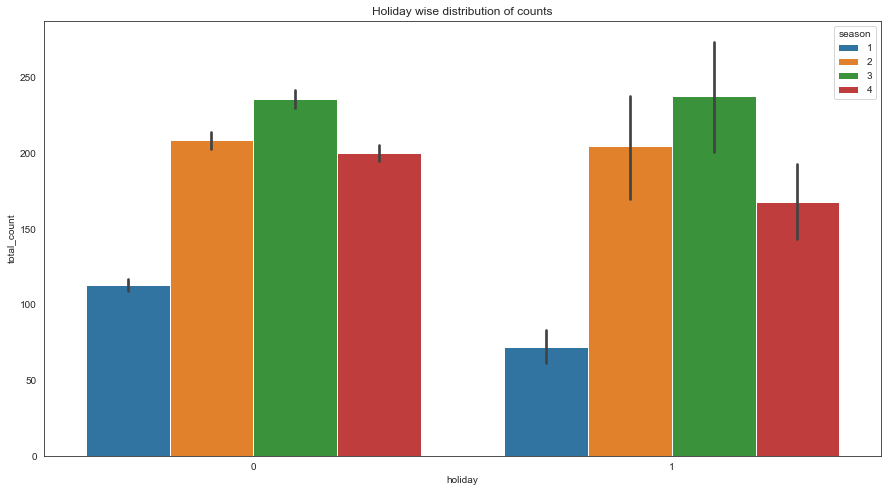

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=bike_df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

### Workingday wise distribution of counts

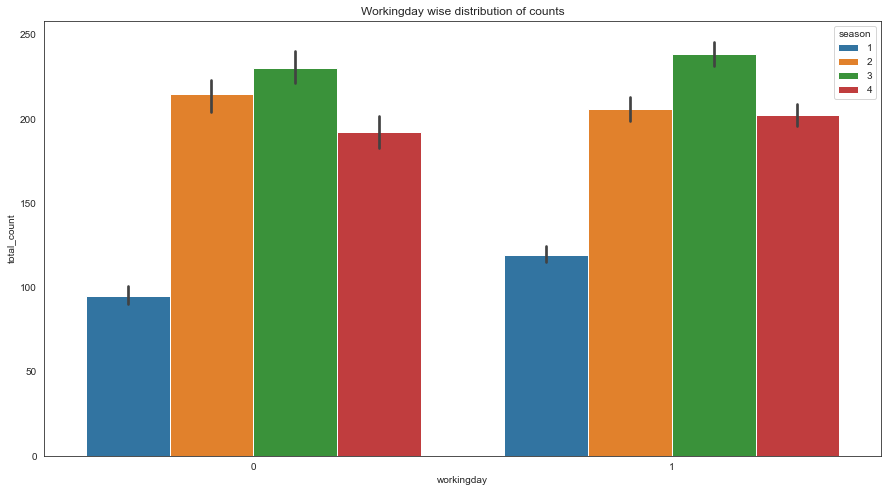

In [24]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike_df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

Here, 0-> No workingday, 1-> workingday

#### Weather_condition distribution of counts

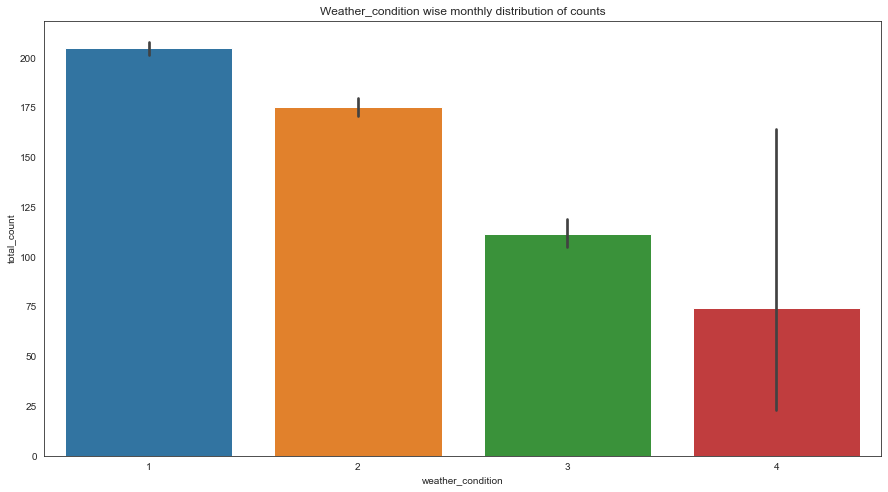

In [25]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike_df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

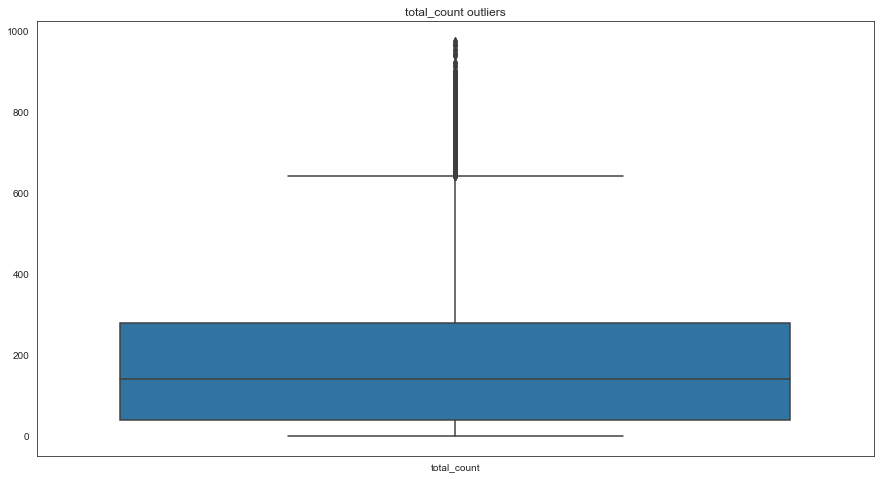

In [26]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike_df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

### Temp_windspeed_humidity_outliers

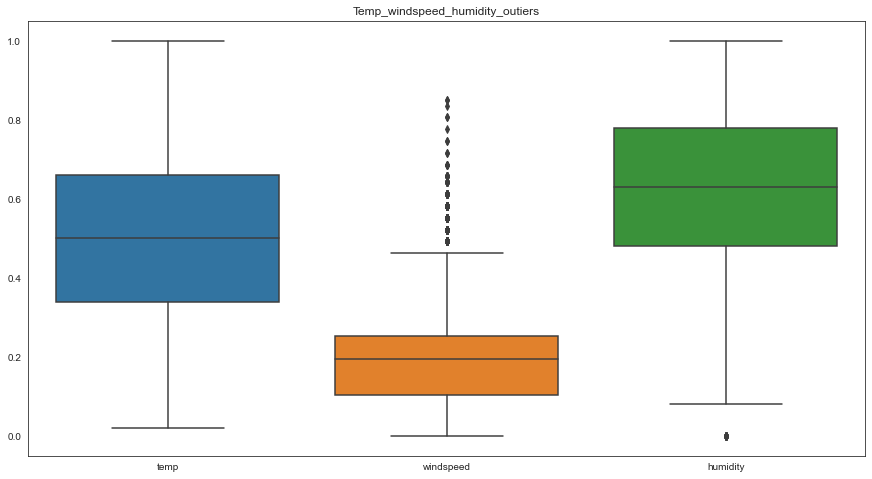

In [27]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

### Replace and impute the outliers

The above probability plot, the some target variable data points are deviates from normality.

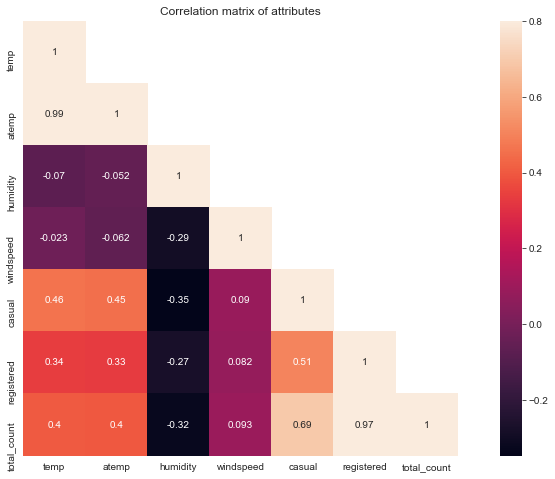

In [28]:
#Create the correlation matrix
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

### Modelling the dataset

In [29]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [30]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike_df.iloc[:,0:-3],bike_df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(12165, 15) (5214, 15) (12165, 2) (5214, 2)
   index  total_count
0  11229            9
1   6334          209
2  11060           30
3  12346          644
4  15437          217
   index  total_count
0  12830          425
1   8688           88
2   7091            4
3  12230          526
4    431           13


In [31]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

### Decoding the training attributes

In [32]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (12165, 19)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,year_0,year_1
0,4,3,0.42,0.50,0.1940,0,1,0,0,1,0,0,1,0,1,0,0,0,1
1,9,1,0.79,0.68,0.1642,0,0,0,1,1,0,0,1,0,1,0,0,1,0
2,4,3,0.36,0.34,0.4179,0,1,0,0,1,0,0,1,1,0,0,0,0,1
3,6,0,0.34,0.70,0.0000,0,1,0,0,1,0,1,0,1,0,0,0,0,1
4,10,3,0.52,0.56,0.2985,0,0,0,1,1,0,0,1,1,0,0,0,0,1


### Training dataset

In [33]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

### Linear Regression

In [34]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

### fit the training model

In [35]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

### Accuraacy of model

In [36]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.3285822818400317
Model coefficients : [   0.63581732    1.18396087 -270.17215942  431.03792011   40.00796114
   -6.44140575   -2.86938415  -42.09370007   51.40448997   14.57332541
  -14.57332541   -1.15979773    1.15979773  -31.35622043  -19.47128148
  -34.23946145   85.06696337  -39.30578668   39.30578668]
Model intercept value : 145.56203575212055


### Cross validation prediction

In [37]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([300.2288509 , 247.6826551 , 245.66134452, ..., 293.42271104,
        34.80732661, 247.67842115])

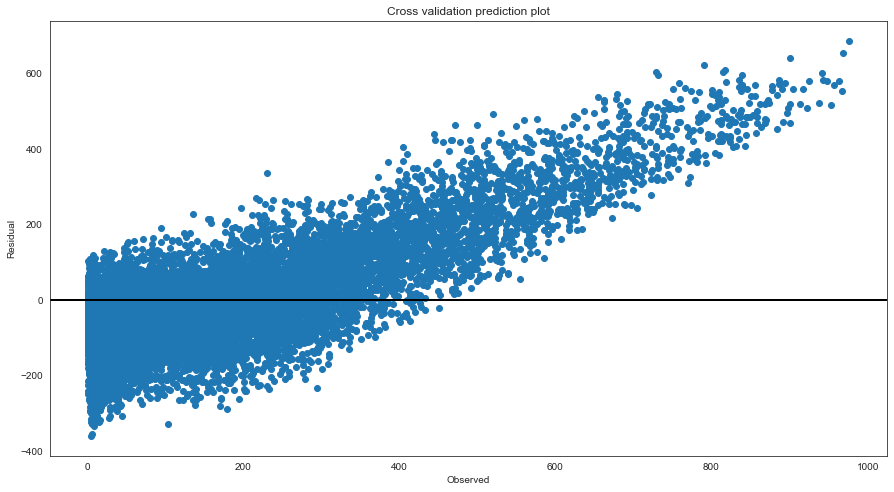

In [38]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

### Model evalution metrics

### R-squared and mean squared error score

In [39]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.32623847385191335


The R-squared or coefficient of determination is 0.80 on average for 3-fold cross validation , it means that predictor is only able to predict 80% of the variance in the target variable which is contributed by independent variables

Decoding the test attribute

In [40]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (5214, 19)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,year_0,year_1
0,6,6,0.27,0.80,0.1940,0,0,1,0,1,0,1,0,1,0,0,0,0,1
1,1,1,0.41,0.24,0.2239,1,0,0,0,0,1,1,0,1,0,0,0,0,1
2,10,5,0.66,0.32,0.2836,0,0,0,1,1,0,0,1,1,0,0,0,1,0
3,5,2,0.52,0.78,0.3582,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,1,4,0.56,0.26,0.3881,1,0,0,0,1,0,0,1,1,0,0,0,1,0


### Model Performance on test dataset

In [41]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

### Predict the model

In [42]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([415.3954963 , 134.79314927, 125.28038635, ..., 393.27763954,
       278.83113925,   6.05775696])

### Model evaluation metrics

### Root mean square error and mean absolute error scores

In [43]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 146.50548706930482
Mean absolute error : 111.54773819423585


#### Residual Plot

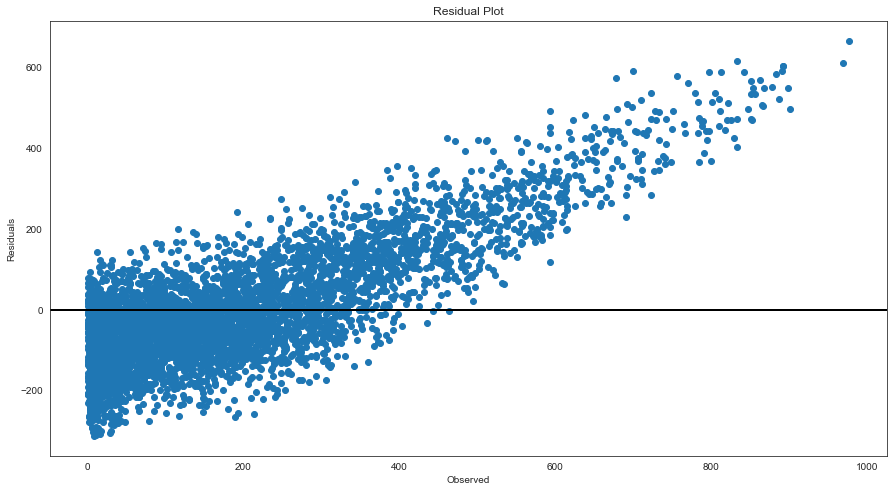

In [44]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

### Decision tree regressor

In [45]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

Fit the Model

In [46]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

### Decision tree regression accuracy

In [47]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.315777004218996


### Plot the learned Graph

In [48]:
#Plot the learned model
from sklearn import tree
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

### cross validation prediction

In [49]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([420.80045351, 125.94238281, 236.66985646, ..., 249.99796541,
        89.55308131, 125.58073654])

### Cross validation prediction plot

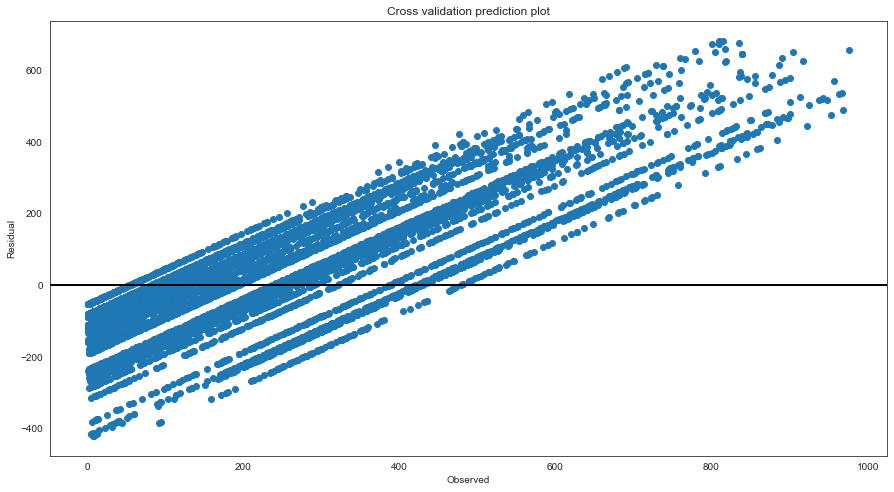

In [50]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot,some data points are have same finite variance between them and for some are not have it.

### Model evalution metrics

### R-squared and mean squared error scores

In [51]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.3034013446438179


The R-squared or coefficient of determination is 0.74 on average for 3-fold cross validation ,it means that predictor is only able to predict 74% of the variance in the target variable which is contributed by independent variables.

### Model performance on the dataset

In [52]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([436.7403946 ,  84.29414158, 115.976205  , ..., 436.7403946 ,
       214.43920829,  84.29414158])

#### Root mean square and mean absolute error

In [53]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 149.21739775571308
Mean absolute error : 113.68063536153555


#### Residual Plot

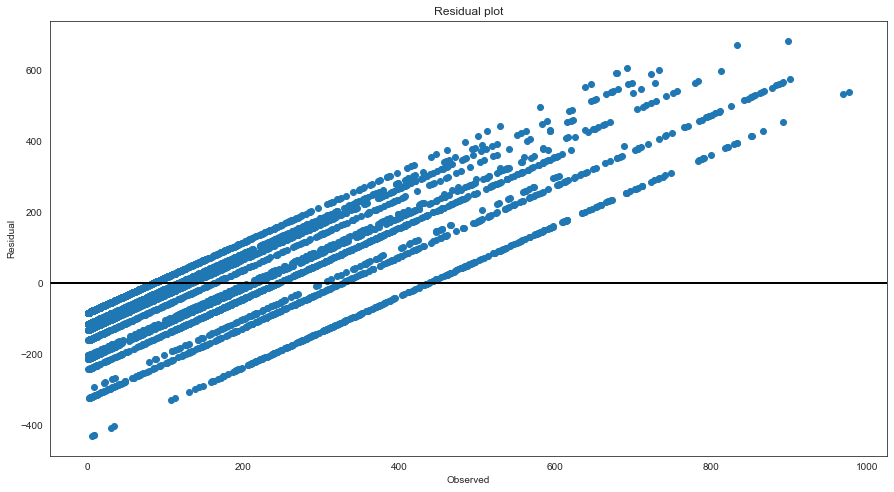

In [54]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

Random Forest

In [55]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [56]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [57]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9091030318433975


In [58]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([309.385     , 246.12833333, 133.262     , ..., 171.097     ,
        55.29      , 297.54797619])

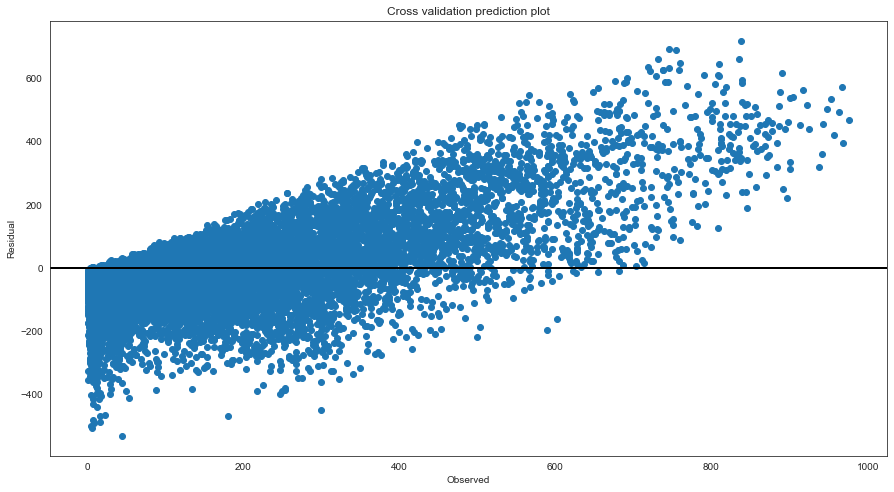

In [59]:
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot,some data points are have same finite variance between them and for some are not have it.

In [60]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.41224381031408014


The R-squared or coefficient of determination is 0.85 on average for 3-fold cross validation , it means that predictor is only able to predict 85% of the variance in the target variable which is contributed by independent variables

In [61]:
#predict the model
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([510.87505952, 126.615     ,  51.795     , ..., 506.65      ,
       421.04466667, 291.81316667])

In [62]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 133.50550281034762
Mean absolute error : 94.89820373963133


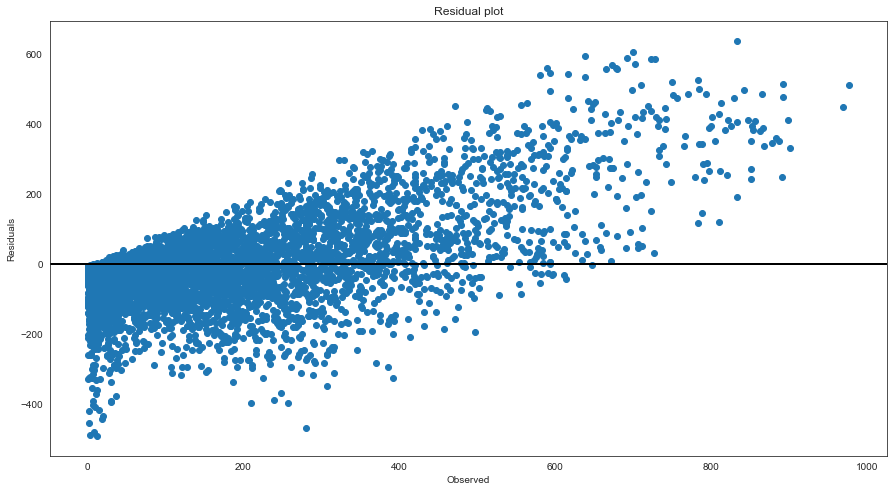

In [63]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()


Cross validation prediction plot tells about finite variance between actual target value and predicted target value.In this plot,some data points are have same finite variance between them and for some are not have it.

### Final model for predicting the bike rental count on daily basis

When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is bset for predicting the bike rental count on daily basis.

In [64]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions

,y_test,rf_pred
0,425,510.875060
1,88,126.615000
2,4,51.795000
3,526,476.623333
4,13,84.457500
...,...,...
5209,167,400.693833
5210,214,305.815000
5211,556,506.650000
5212,312,421.044667


In [65]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))